In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


Class distribution before oversampling:
Class
0    763
1      9
Name: count, dtype: int64

Class distribution before oversampling (percentage):
Class
0    98.834197
1     1.165803
Name: proportion, dtype: float64
Class distribution after SMOTE (count):
Class
0    763
1    763
Name: count, dtype: int64

Class distribution after SMOTE (percentage):
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


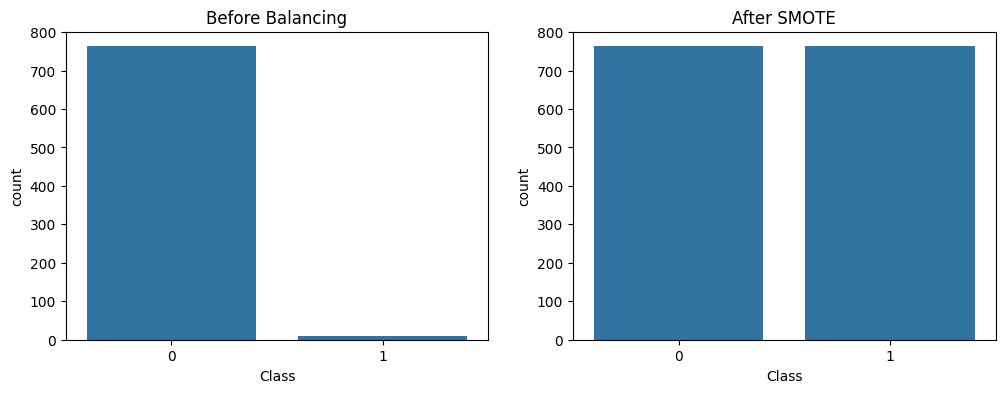

In [23]:
X = df.drop("Class", axis=1)
y = df["Class"]

print("Class distribution before oversampling:")
print(pd.Series(y).value_counts())

print("\nClass distribution before oversampling (percentage):")
print(pd.Series(y).value_counts(normalize=True) * 100)


X = df.drop("Class", axis=1)
y = df["Class"]

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


print("Class distribution after SMOTE (count):")
print(pd.Series(y_smote).value_counts())

print("\nClass distribution after SMOTE (percentage):")
print(pd.Series(y_smote).value_counts(normalize=True) * 100)

fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x='Class', data=df, ax=axes[0])
axes[0].set_title("Before Balancing")

sns.countplot(x=y_smote, ax=axes[1])
axes[1].set_title("After SMOTE")

plt.show()


In [18]:
X = df.drop("Class", axis=1)
y = df["Class"]

print("Class distribution before oversampling:")
print(pd.Series(y).value_counts())

print("\nClass distribution before oversampling (percentage):")
print(pd.Series(y).value_counts(normalize=True) * 100)

Class distribution before oversampling:
Class
0    763
1      9
Name: count, dtype: int64

Class distribution before oversampling (percentage):
Class
0    98.834197
1     1.165803
Name: proportion, dtype: float64


In [24]:
# ===============================
# STEP 1: Import Libraries
# ===============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE

# ===============================
# STEP 2: Load Dataset
# ===============================
df = pd.read_csv("Creditcard_data.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

# ===============================
# STEP 3: Balance Dataset (OVERSAMPLING - SMOTE)
# ===============================
smote = SMOTE(
    sampling_strategy='auto',
    random_state=42,
    k_neighbors=5
)

X_bal, y_bal = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_bal).value_counts())

# ===============================
# STEP 4: Sampling Techniques
# ===============================
def simple_sampling(X, y):
    return X, y

def systematic_sampling(X, y):
    step = 2
    idx = np.arange(0, len(X), step)
    return X.iloc[idx], y.iloc[idx]

def stratified_sampling(X, y):
    X_s, _, y_s, _ = train_test_split(
        X, y,
        train_size=0.7,
        stratify=y,
        random_state=42
    )
    return X_s, y_s

def cluster_sampling(X, y):
    return X.iloc[::3], y.iloc[::3]

def bootstrap_sampling(X, y):
    X_res, y_res = resample(
        X, y,
        replace=True,
        random_state=42
    )
    return X_res, y_res

# ===============================
# STEP 5: Models (Accuracy Optimized)
# ===============================
models = {
    "M1": LogisticRegression(
        max_iter=2000,
        solver='lbfgs',
        class_weight='balanced'
    ),
    "M2": DecisionTreeClassifier(
        max_depth=12,
        class_weight='balanced',
        random_state=42
    ),
    "M3": RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        class_weight='balanced',
        random_state=42
    ),
    "M4": SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        class_weight='balanced'
    ),
    "M5": KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    )
}

samplings = {
    "Sampling1": simple_sampling,
    "Sampling2": systematic_sampling,
    "Sampling3": stratified_sampling,
    "Sampling4": cluster_sampling,
    "Sampling5": bootstrap_sampling
}

# ===============================
# STEP 6: Evaluation
# ===============================
results = {}

for s_name, s_func in samplings.items():
    print(f"\nRunning {s_name}...")
    results[s_name] = {}

    X_s, y_s = s_func(X_bal, y_bal)

    X_train, X_test, y_train, y_test = train_test_split(
        X_s, y_s,
        test_size=0.3,
        random_state=42,
        stratify=y_s
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for m_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred) * 100
        results[s_name][m_name] = round(acc, 2)

# ===============================
# STEP 7: Display Results
# ===============================
final_results = pd.DataFrame(results)
print("\nFinal Accuracy Table:\n")
print(final_results)



Class distribution after SMOTE:
Class
0    763
1    763
Name: count, dtype: int64

Running Sampling1...

Running Sampling2...

Running Sampling3...

Running Sampling4...

Running Sampling5...

Final Accuracy Table:

    Sampling1  Sampling2  Sampling3  Sampling4  Sampling5
M1      91.70      87.77      90.97      84.97      96.07
M2      97.82      95.63      99.07      96.73      99.56
M3      98.91      98.25      99.69      99.35     100.00
M4      98.69      97.38      97.51      98.04      99.56
M5      95.63      91.70      93.15      90.85      98.25
